# **Equipo #3:**

*   Maythe Escobedo Madera                  1902026
*   Daniela Patricia Contreras Rodríguez    1895178
*   María Fernanda Díaz García              1799844        

*Hora: N4*

# **Producto Integrador de Aprendizaje** - *Inteligencia Artifical*

**Introducción**

Este proyecto consiste en el entrenamiento de dos redes neuronales convolusionales. 

Mediante la genereación de un conjunto de datos, se entrenó a las redes para que tuvieran la capacidad de reprocesar, normalizar y visualizar las variables en dónde los datos se encuentran almacenados.

Como resultado, la primera red neuronal se probará nuetro dataset con el dataset de MNIST dentro de keras y probarlo con su dataset

 identificarán y mostrarán las imágenes que se les solicite con base en el entrenamiento previamente mencionado.

**Librerías:**

La primera parte consiste en importar librerías necesarias para el entrenamiento de las redes neuronales.


In [ ]:
# Importar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

**Preprocesamiento:**

En esta sección se importan las imágenes, posteriormente se reescalan y finalmente se dividen en grupo de entrenamiento y grupo de validación.

A continuación se muestra la explicación de la división del conjunto de imágenes (80-20).

In [ ]:
#Arrays
array_res=[]
array_lbs=[]

In [ ]:

for images in glob.glob("/content/numero/0*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(0)

for images in glob.glob("/content/numero/1*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(1)

for images in glob.glob("/content/numero/2*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(2)

for images in glob.glob("/content/numero/3*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(3)

for images in glob.glob("/content/numero/4*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(4)

for images in glob.glob("/content/numero/5*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(5)

for images in glob.glob("/content/numero/6*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(6)

for images in glob.glob("/content/numero/7*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(7)

for images in glob.glob("/content/numero/8*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(8)

for images in glob.glob("/content/numero/9*"):
  test_image = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
  img_res = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
  array_res.append(img_res)
  array_lbs.append(9)

In [ ]:
# Total de imágenes almacenadas
len(array_res)

300

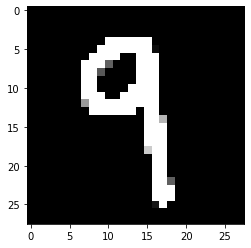

In [ ]:
plt.imshow(array_res[270], cmap='gray')

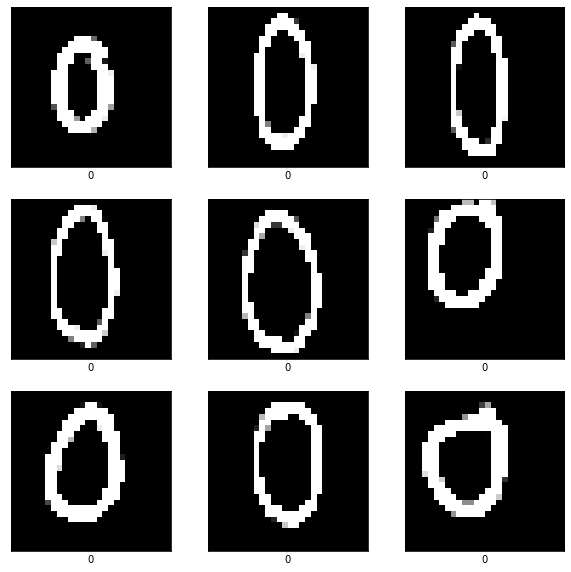

300


Text(0.5, 0, '0')

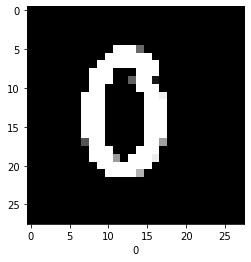

In [ ]:
# Después resize
plt.figure(figsize=(10,10))
for i in range (9):
   plt.subplot(330 + 1 + i)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(array_res[i], cmap=plt.get_cmap('gray'))
   plt.xlabel(array_lbs[i])
plt.show()

# Despues resize verificación ind
print(len(array_res))
plt.imshow(array_res[0], cmap='gray')
plt.xlabel(array_lbs[0])

In [ ]:

train_images=[]
train_labels=[]
test_images=[]
test_labels=[]
i=0
j=0
for i in range(0, len(array_res), 30):
  for j in range(24):
    train_images.append(array_res[i+j])
    train_labels.append(array_lbs[i+j])
  for j in range(6):
    test_images.append(array_res[i+24+j])
    test_labels.append(array_lbs[i+24+j])

In [ ]:
# Normalización
test_images=np.array(test_images)
test_labels=np.array(test_labels)
train_images=np.array(train_images)
train_labels=np.array(train_labels)

test_images=test_images/255.0
train_images=train_images/255.0

In [ ]:
# Visualización
print(type(train_images))
train_images.shape

<class 'numpy.ndarray'>


(240, 28, 28)

In [ ]:
print(type(train_labels))
train_labels.shape

<class 'numpy.ndarray'>


(240,)

In [ ]:
print(type(test_images))
test_images.shape

<class 'numpy.ndarray'>


(60, 28, 28)

In [ ]:
print(type(test_labels))
test_labels.shape

<class 'numpy.ndarray'>


(60,)

In [ ]:
len(train_labels)

240

In [ ]:
len(test_labels)

60

**Entrenamiento y estructura de una Red Neuronal Artificial Convolusional (RNAC)**

En esta sección se establece la cantidad de capas de convolusión y capas de aprendizaje para la red neuronal artificial cpnvolusional.

In [121]:
# Parte convolusional de la RNAC
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [122]:
# Parte de clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [123]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_13 (Flatten)        (None, 576)             

In [124]:
# CompiLación del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [134]:
# Entrenamiento de la RNAC
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
8/8 [==============================] - 0s 37ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.3002 - val_accuracy: 0.1000
Epoch 2/10
8/8 [==============================] - 0s 34ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.3003 - val_accuracy: 0.1000
Epoch 3/10
8/8 [==============================] - 0s 32ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.3003 - val_accuracy: 0.1000
Epoch 4/10
8/8 [==============================] - 0s 33ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.3000 - val_accuracy: 0.1000
Epoch 5/10
8/8 [==============================] - 0s 33ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.3000 - val_accuracy: 0.1000
Epoch 6/10
8/8 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.3000 - val_accuracy: 0.1000
Epoch 7/10
8/8 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.3000 - val_accuracy: 0.1000
Epoch 8/10
8/8 [===========

**Resultados de exactitud de la RNAC**

A continuación se muestra la comparación entre la exactitud de entrenamiento y validación.

8/8 - 0s - loss: 2.3026 - accuracy: 0.1000 - 74ms/epoch - 9ms/step


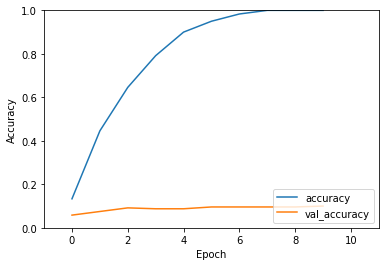

In [129]:
# Gráfica con la diferencia de valores de exactitud del entrenamiento y la validación. 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [127]:
print(test_acc)

0.10000000149011612


**Predicciones con la RNAC entrenada:**

Se muestran al menos tres predicciones de dígitos del 0 al 9. 

In [128]:
predictions = model.predict(test_images)
x = np.argmax(predictions[1])
y = test_labels[1]
print("La red dice que la imagen es clase: " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase: 0 y la clase verdadera es: 0.0


In [ ]:
predictions = model.predict(test_images)
x = np.argmax(predictions[24])
y = test_labels[24]
print("La red dice que la imagen es clase: " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase: 1 y la clase verdadera es: 0.00392156862745098


In [136]:
predictions = model.predict(test_images)
x = np.argmax(predictions[50])
y = test_labels[50]
print("La red dice que la imagen es clase: " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase: 2 y la clase verdadera es: 0.00784313725490196


**Referencias**
1.   https://www.tensorflow.org/tutorials/images/cnn?hl=es-419
2.   https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
3.   https://keras.io/api/datasets/mnist/ 